<div align="center">
<h1>IRT Data Generator</h1>
</div>


# 0. Overview

This notebook demonstrates how to generate synthetic Item Response Theory (IRT) data for educational and research purposes. The notebook covers:

1. **Understanding IRT Models**: 1PL, 2PL, and 3PL models
2. **Data Generation Process**: Creating realistic student abilities and item parameters
3. **Response Simulation**: Generating binary responses based on IRT probabilities
4. **Data Export**: Saving generated data for further analysis

## What You'll Learn

- How IRT models work mathematically
- How to generate realistic educational data
- The differences between 1PL, 2PL, and 3PL models
- How to create datasets suitable for IRT analysis


# 1. Import Required Libraries


First, let's import all the necessary libraries for our IRT data generation process.

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")


Libraries imported successfully!
NumPy version: 1.24.3
Pandas version: 2.0.2


# 2. Understanding IRT Models

## What is Item Response Theory?

Item Response Theory (IRT) is a psychometric framework for designing, analyzing, and scoring tests, questionnaires, and other instruments that measure abilities, attitudes, or other variables.

### Key IRT Models:

1. **1PL (Rasch Model)**: Only difficulty parameter (b)
2. **2PL Model**: Difficulty (b) + discrimination (a) parameters  
3. **3PL Model**: Difficulty (b) + discrimination (a) + guessing (c) parameters

### The 3PL Model Formula:

**P(correct) = c + (1-c) / (1 + exp(-a(θ-b)))**

Where:
- **θ (theta)**: Student ability
- **b**: Item difficulty  
- **a**: Item discrimination
- **c**: Guessing parameter


# 3. IRT Data Generation Function


Let's create a comprehensive function to generate IRT data with different model specifications.


In [3]:
def generate_irt_data(n_students=500, n_items=20, model="3PL", seed=42):
    """
    Generate synthetic IRT data based on specified model.

    Parameters:
    -----------
    n_students : int
        Number of students to simulate
    n_items : int
        Number of items to simulate
    model : str
        IRT model to use ('1PL', '2PL', or '3PL')
    seed : int
        Random seed for reproducibility

    Returns:
    --------
    responses_df : pandas DataFrame
        Matrix of student responses (1=correct, 0=incorrect)
    parameters_df : pandas DataFrame
        Item parameters for the generated items
    abilities : numpy array
        Generated ability parameters for students
    """
    np.random.seed(seed)

    # Generate student abilities from N(0, 1)
    abilities = np.random.normal(0, 1, size=n_students)

    # Generate item parameters
    difficulties = np.random.uniform(-3, 3, size=n_items)  # b parameters

    if model in ["2PL", "3PL"]:
        discriminations = np.random.uniform(0.5, 2.0, size=n_items)  # a parameters
    else:
        discriminations = np.ones(n_items)  # For 1PL, all discriminations = 1

    if model == "3PL":
        guessing = np.random.uniform(0.05, 0.25, size=n_items)  # c parameters
    else:
        guessing = np.zeros(n_items)  # For 1PL/2PL, no guessing

    # Generate response probabilities using the IRT model
    responses = np.zeros((n_students, n_items))
    for i in range(n_students):
        for j in range(n_items):
            theta = abilities[i]
            a = discriminations[j]
            b = difficulties[j]
            c = guessing[j]

            # 3PL model formula: P(correct) = c + (1-c) / (1 + exp(-a(theta-b)))
            p = c + (1 - c) / (1 + np.exp(-a * (theta - b)))
            responses[i, j] = np.random.binomial(1, p)

    # Create DataFrames
    responses_df = pd.DataFrame(
        responses,
        columns=[f"item_{j+1}" for j in range(n_items)]
    )
    responses_df.insert(0, "student_id", range(1, n_students + 1))

    parameters_df = pd.DataFrame({
        "item_id": [f"item_{j+1}" for j in range(n_items)],
        "difficulty": difficulties,
        "discrimination": discriminations,
        "guessing": guessing
    })

    return responses_df, parameters_df, abilities

print("IRT data generation function created successfully!")


IRT data generation function created successfully!


# 4. Generate Sample Data


Let's generate sample data using different IRT models to see how they compare.


In [4]:
# Generate data using different models
print("Generating IRT data with different models...")

# 1PL Model (Rasch)
responses_1pl, params_1pl, abilities_1pl = generate_irt_data(
    n_students=200, n_items=10, model="1PL", seed=42
)

# 2PL Model
responses_2pl, params_2pl, abilities_2pl = generate_irt_data(
    n_students=200, n_items=10, model="2PL", seed=42
)

# 3PL Model
responses_3pl, params_3pl, abilities_3pl = generate_irt_data(
    n_students=200, n_items=10, model="3PL", seed=42
)

print("Data generation completed!")
print(f"1PL Model - Students: {len(responses_1pl)}, Items: {len(params_1pl)}")
print(f"2PL Model - Students: {len(responses_2pl)}, Items: {len(params_2pl)}")
print(f"3PL Model - Students: {len(responses_3pl)}, Items: {len(params_3pl)}")


Generating IRT data with different models...
Data generation completed!
1PL Model - Students: 200, Items: 10
2PL Model - Students: 200, Items: 10
3PL Model - Students: 200, Items: 10


# 5. Explore Generated Data


Let's examine the structure and characteristics of our generated data.


In [5]:
# Examine 3PL model data (most comprehensive)
print("=== 3PL Model Data Overview ===")
print("\nResponse Matrix (first 5 students):")
print(responses_3pl.head())

print("\nItem Parameters:")
print(params_3pl)

print("\nStudent Abilities (first 10):")
print(abilities_3pl[:10])

print(f"\nData Summary:")
print(f"- Total students: {len(responses_3pl)}")
print(f"- Total items: {len(params_3pl)}")
print(f"- Average score: {responses_3pl.iloc[:, 1:].mean().mean():.3f}")
print(f"- Score range: {responses_3pl.iloc[:, 1:].sum(axis=1).min()} - {responses_3pl.iloc[:, 1:].sum(axis=1).max()}")


=== 3PL Model Data Overview ===

Response Matrix (first 5 students):
   student_id  item_1  item_2  item_3  item_4  item_5  item_6  item_7  item_8  \
0           1     0.0     0.0     1.0     0.0     1.0     1.0     0.0     0.0   
1           2     0.0     1.0     0.0     0.0     0.0     1.0     0.0     0.0   
2           3     1.0     1.0     0.0     0.0     1.0     1.0     0.0     0.0   
3           4     1.0     0.0     1.0     1.0     1.0     1.0     0.0     1.0   
4           5     0.0     0.0     1.0     0.0     1.0     1.0     0.0     0.0   

   item_9  item_10  
0     0.0      0.0  
1     0.0      1.0  
2     1.0      0.0  
3     0.0      0.0  
4     0.0      0.0  

Item Parameters:
   item_id  difficulty  discrimination  guessing
0   item_1    2.264238        1.267014  0.165656
1   item_2    1.444612        1.252274  0.057188
2   item_3    1.182094        1.697443  0.143120
3   item_4    1.214905        1.474946  0.158529
4   item_5   -0.843053        1.552950  0.107308
5   it

# 6. Visualize Data Characteristics


Let's create visualizations to better understand our generated data.


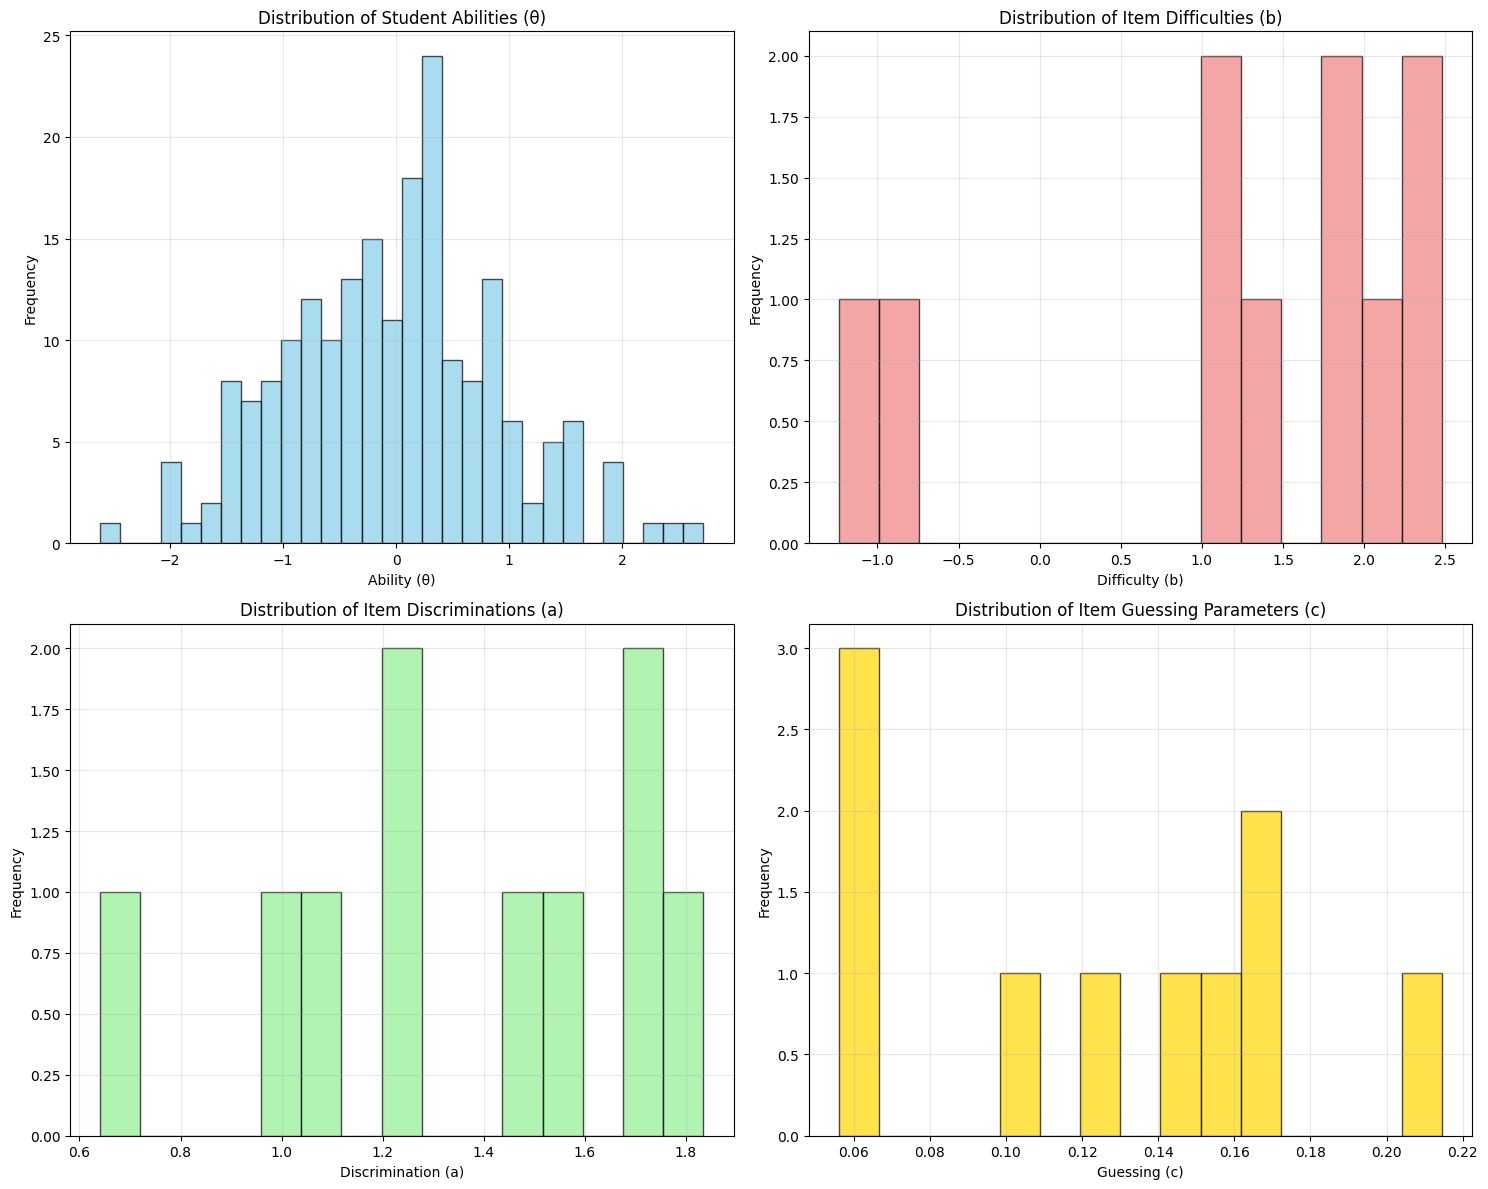

In [6]:
# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Student ability distribution
axes[0, 0].hist(abilities_3pl, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Student Abilities (θ)')
axes[0, 0].set_xlabel('Ability (θ)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, alpha=0.3)

# 2. Item difficulty distribution
axes[0, 1].hist(params_3pl['difficulty'], bins=15, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Distribution of Item Difficulties (b)')
axes[0, 1].set_xlabel('Difficulty (b)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(True, alpha=0.3)

# 3. Item discrimination distribution
axes[1, 0].hist(params_3pl['discrimination'], bins=15, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Distribution of Item Discriminations (a)')
axes[1, 0].set_xlabel('Discrimination (a)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(True, alpha=0.3)

# 4. Item guessing distribution
axes[1, 1].hist(params_3pl['guessing'], bins=15, alpha=0.7, color='gold', edgecolor='black')
axes[1, 1].set_title('Distribution of Item Guessing Parameters (c)')
axes[1, 1].set_xlabel('Guessing (c)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# 7. Compare Different IRT Models


Let's compare the characteristics of data generated by different IRT models.


In [7]:
# Compare model characteristics
print("=== Model Comparison ===")
print("\nItem Parameters Comparison:")
print("\n1PL Model (Rasch):")
print(f"- All discriminations = 1.0")
print(f"- No guessing parameters")
print(f"- Difficulty range: {params_1pl['difficulty'].min():.2f} to {params_1pl['difficulty'].max():.2f}")

print("\n2PL Model:")
print(f"- Discrimination range: {params_2pl['discrimination'].min():.2f} to {params_2pl['discrimination'].max():.2f}")
print(f"- No guessing parameters")
print(f"- Difficulty range: {params_2pl['difficulty'].min():.2f} to {params_2pl['difficulty'].max():.2f}")

print("\n3PL Model:")
print(f"- Discrimination range: {params_3pl['discrimination'].min():.2f} to {params_3pl['discrimination'].max():.2f}")
print(f"- Guessing range: {params_3pl['guessing'].min():.3f} to {params_3pl['guessing'].max():.3f}")
print(f"- Difficulty range: {params_3pl['difficulty'].min():.2f} to {params_3pl['difficulty'].max():.2f}")

# Compare response patterns
print("\n=== Response Pattern Comparison ===")
for model_name, responses in [("1PL", responses_1pl), ("2PL", responses_2pl), ("3PL", responses_3pl)]:
    avg_score = responses.iloc[:, 1:].mean().mean()
    score_std = responses.iloc[:, 1:].sum(axis=1).std()
    print(f"{model_name} Model - Average probability: {avg_score:.3f}, Score std: {score_std:.2f}")


=== Model Comparison ===

Item Parameters Comparison:

1PL Model (Rasch):
- All discriminations = 1.0
- No guessing parameters
- Difficulty range: -1.24 to 2.48

2PL Model:
- Discrimination range: 0.64 to 1.84
- No guessing parameters
- Difficulty range: -1.24 to 2.48

3PL Model:
- Discrimination range: 0.64 to 1.84
- Guessing range: 0.056 to 0.215
- Difficulty range: -1.24 to 2.48

=== Response Pattern Comparison ===
1PL Model - Average probability: 0.289, Score std: 1.85
2PL Model - Average probability: 0.274, Score std: 1.83
3PL Model - Average probability: 0.355, Score std: 1.75


# 8. Save Generated Data


Now let's save our generated data to files for further analysis or use in other notebooks.


In [8]:
# Create data directory if it doesn't exist
data_dir = "../data"
os.makedirs(data_dir, exist_ok=True)

# Save 3PL model data (most comprehensive)
print("Saving generated data...")

# Save response matrices
responses_3pl.to_csv(os.path.join(data_dir, "irt_responses_3pl.csv"), index=False)
responses_2pl.to_csv(os.path.join(data_dir, "irt_responses_2pl.csv"), index=False)
responses_1pl.to_csv(os.path.join(data_dir, "irt_responses_1pl.csv"), index=False)

# Save parameter matrices
params_3pl.to_csv(os.path.join(data_dir, "irt_parameters_3pl.csv"), index=False)
params_2pl.to_csv(os.path.join(data_dir, "irt_parameters_2pl.csv"), index=False)
params_1pl.to_csv(os.path.join(data_dir, "irt_parameters_1pl.csv"), index=False)

# Save ability arrays
np.save(os.path.join(data_dir, "student_abilities_3pl.npy"), abilities_3pl)
np.save(os.path.join(data_dir, "student_abilities_2pl.npy"), abilities_2pl)
np.save(os.path.join(data_dir, "student_abilities_1pl.npy"), abilities_1pl)

print("Data saved successfully!")
print(f"Files saved to: {data_dir}")
print("\nSaved files:")
print("- irt_responses_1pl.csv, irt_responses_2pl.csv, irt_responses_3pl.csv")
print("- irt_parameters_1pl.csv, irt_parameters_2pl.csv, irt_parameters_3pl.csv")
print("- student_abilities_1pl.npy, student_abilities_2pl.npy, student_abilities_3pl.npy")


Saving generated data...
Data saved successfully!
Files saved to: ../data

Saved files:
- irt_responses_1pl.csv, irt_responses_2pl.csv, irt_responses_3pl.csv
- irt_parameters_1pl.csv, irt_parameters_2pl.csv, irt_parameters_3pl.csv
- student_abilities_1pl.npy, student_abilities_2pl.npy, student_abilities_3pl.npy


# 9. Summary and Next Steps


## What We've Accomplished

1. **Generated synthetic IRT data** using three different models (1PL, 2PL, 3PL)
2. **Explored data characteristics** through visualizations and statistics
3. **Compared model differences** in terms of parameters and response patterns
4. **Saved data files** for further analysis

## Key Takeaways

- **1PL (Rasch) Model**: Simplest model with only difficulty parameters
- **2PL Model**: Adds discrimination parameters for varying item quality
- **3PL Model**: Most comprehensive with difficulty, discrimination, and guessing parameters

## Next Steps

You can now use this generated data for:
- **IRT model fitting** and parameter estimation
- **Adaptive testing simulations**
- **Educational assessment research**
- **Psychometric analysis**

## Files Generated

- Response matrices for each model
- Item parameter files
- Student ability arrays
- All saved in the `../data/` directory
